In [1]:
# %matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import glob
from scipy import stats
from scipy.optimize import curve_fit
import scipy
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import read_data
from scipy.stats import itemfreq


In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams.update({'font.size': 15})

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [3]:
# Give component names in the order they apear in the scorep output
components = ["spreadParticleForce", "collideAndStream", "interpolateFluidVelocity", "syncEnvelopes", "advanceParticles", "applyConstitutiveModel", "deleteNonLocalParticles", "setExternalVector"]
raw_df = read_data.gen_df("./results", components)

EmptyDataError on file: ./results/profiling-experiment.csv
Skipping file


In [22]:
fitting_sizes = ["s1", "s3", "s5", "s6", "s8"]
testing_sizes = ["s2", "s4", "s7", "s9"]
fitting_df = raw_df[ raw_df['sizestr'].isin(fitting_sizes)]
testing_df = raw_df[ raw_df['sizestr'].isin(testing_sizes)]

data = []
for sizestr in np.sort(np.unique(raw_df['sizestr'])):
    tmp = raw_df.loc[raw_df['sizestr'] == sizestr]
    s = np.array(tmp['size'])[0]
    N = np.array(tmp['N'])[0]
    st = np.array(tmp['total_size'])[0]

    
    for H in np.sort(np.unique(raw_df.loc[raw_df['sizestr'] == sizestr]['H'])):
        n = np.unique(tmp.loc[tmp['H'] == H]['jobid']).size
        rbc = np.array(tmp.loc[tmp['H'] == H]['RBCs'])[0]


        data.append([sizestr, s, st, N, H, rbc, n])
        

exp_df = pd.DataFrame(data, columns=['sizestr', 'size', 'total_size', 'N', 'H', 'RBCs', 'n']).sort_values('N')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(exp_df)

raw_df

,sizestr,size,total_size,N,H,RBCs,n
0,s1,"(25, 50, 25)","(150, 100, 50)",31250,0,0.000000,4
1,s1,"(25, 50, 25)","(150, 100, 50)",31250,9,2.916667,3
2,s1,"(25, 50, 25)","(150, 100, 50)",31250,10,3.500000,3
3,s1,"(25, 50, 25)","(150, 100, 50)",31250,12,4.083333,2
4,s1,"(25, 50, 25)","(150, 100, 50)",31250,14,4.666667,2
5,s1,"(25, 50, 25)","(150, 100, 50)",31250,16,5.250000,2
6,s1,"(25, 50, 25)","(150, 100, 50)",31250,18,5.833333,2
13,s2,"(25, 50, 50)","(150, 100, 100)",62500,18,14.583333,2
12,s2,"(25, 50, 50)","(150, 100, 100)",62500,16,13.125000,2
11,s2,"(25, 50, 50)","(150, 100, 100)",62500,14,11.666667,2


,jobid,sizestr,size,total_size,N,area,RBCs,H,component,total,comm,comp
0,4262,s8,"(100, 100, 100)","(600, 200, 200)",1000000,60000,250.00,18,spreadParticleForce,65.420200,0.00000,65.420200
1,4262,s8,"(100, 100, 100)","(600, 200, 200)",1000000,60000,250.00,18,collideAndStream,263.983000,15.64520,248.337000
2,4262,s8,"(100, 100, 100)","(600, 200, 200)",1000000,60000,250.00,18,interpolateFluidVelocity,10.759000,0.00000,10.759000
3,4262,s8,"(100, 100, 100)","(600, 200, 200)",1000000,60000,250.00,18,syncEnvelopes,14.442700,5.00000,9.442680
4,4262,s8,"(100, 100, 100)","(600, 200, 200)",1000000,60000,250.00,18,advanceParticles,20.900100,0.00000,20.900100
...,...,...,...,...,...,...,...,...,...,...,...,...
1227,7154,s4,"(50, 50, 50)","(300, 100, 100)",125000,15000,18.75,10,syncEnvelopes,1.449720,0.88407,0.565651
1228,7154,s4,"(50, 50, 50)","(300, 100, 100)",125000,15000,18.75,10,advanceParticles,1.923480,0.00000,1.923480
1229,7154,s4,"(50, 50, 50)","(300, 100, 100)",125000,15000,18.75,10,applyConstitutiveModel,0.446550,0.00000,0.446550
1230,7154,s4,"(50, 50, 50)","(300, 100, 100)",125000,15000,18.75,10,deleteNonLocalParticles,0.119739,0.00000,0.119739


# Fitting

collideAndStream
7.872833300421036 + (xs \times ys \times zs) * 0.0002446139614068641
setExternalVector
-0.009502031355984819 + (xs \times ys \times zs) * 2.201383568306894e-05


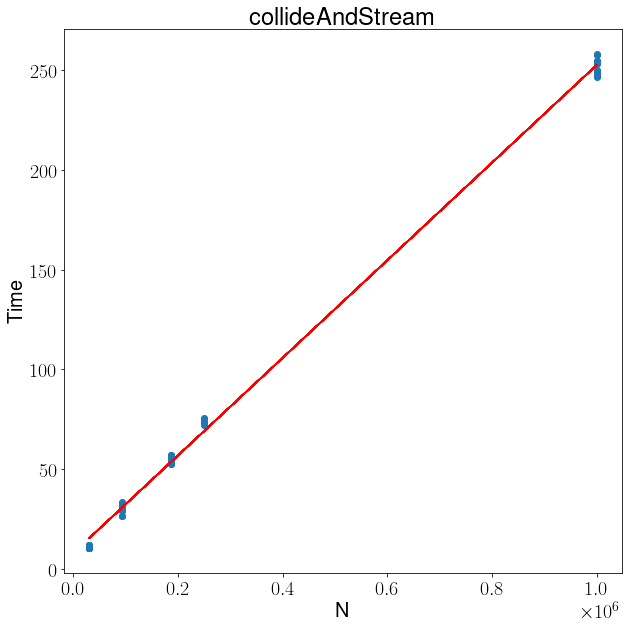

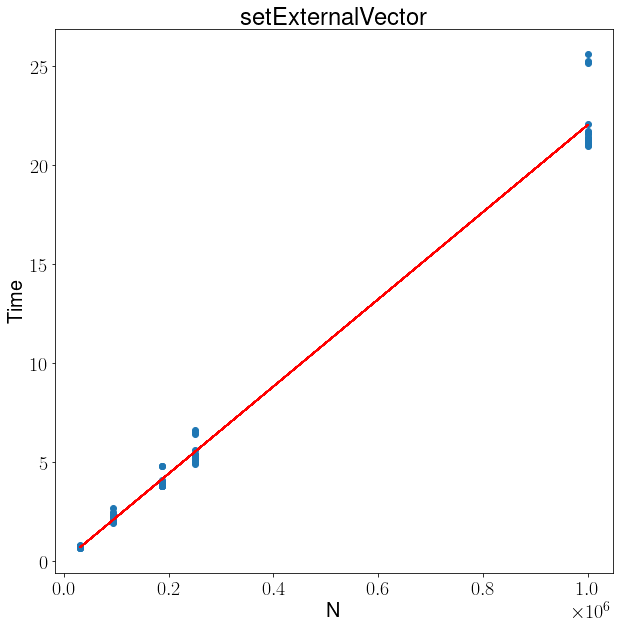

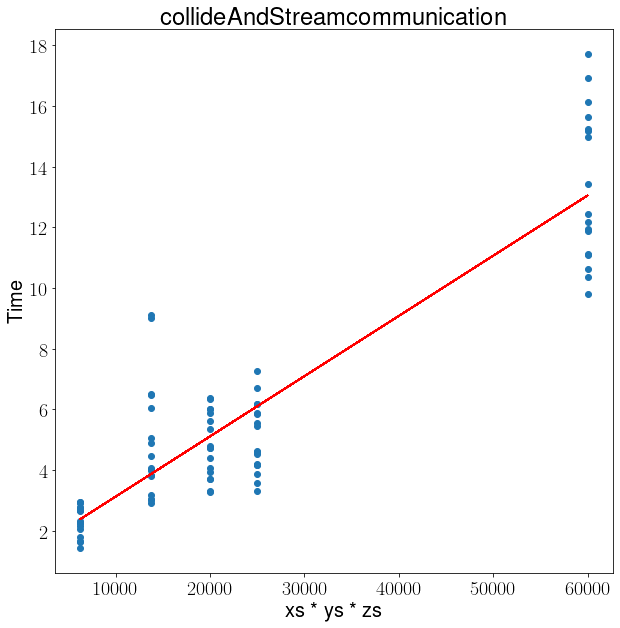

collideAndStream
1.1408344384654479 + (xs, ys, zs) * 0.0001984598467059103
syncEnvelopes
0.07638941302386448 + RBCs * 0.03308470360599657
applyConstitutiveModel
0.005734979242557392 + RBCs * 0.02866335616415567
deleteNonLocalParticles
0.020595057883902035 + RBCs * 0.010053110319246031
spreadParticleForce
1.5957416903555846 + RBCs * 0.2542219287785848
interpolateFluidVelocity
0.4313025603954208 + RBCs * 0.042167126432770985
advanceParticles
0.7054409136450976 + RBCs * 0.08265910418043447
syncEnvelopes
0.6627873050596605 + (xs, ys, zs) * 3.077949529097006e-05 + RBCs * 0.006494656586561857


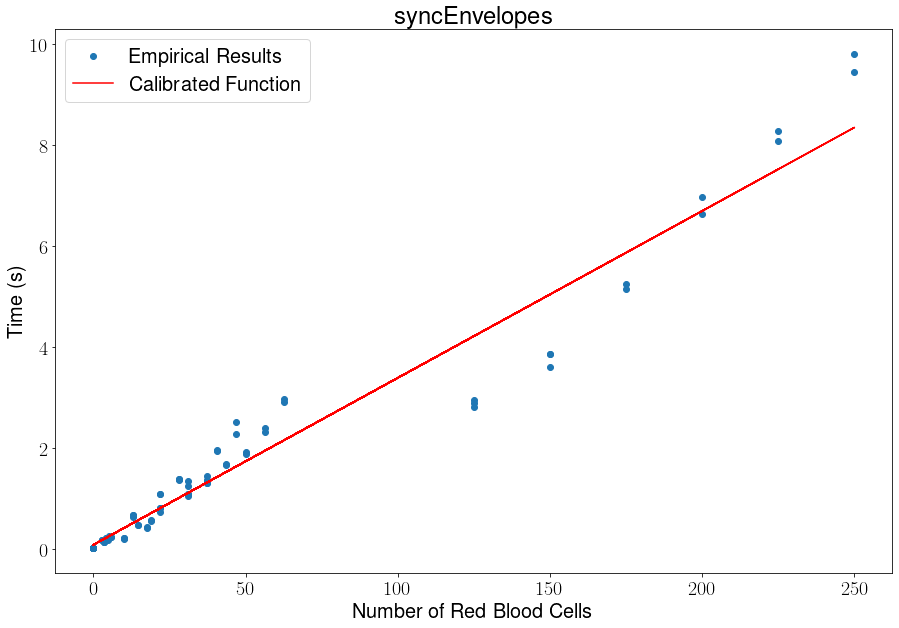

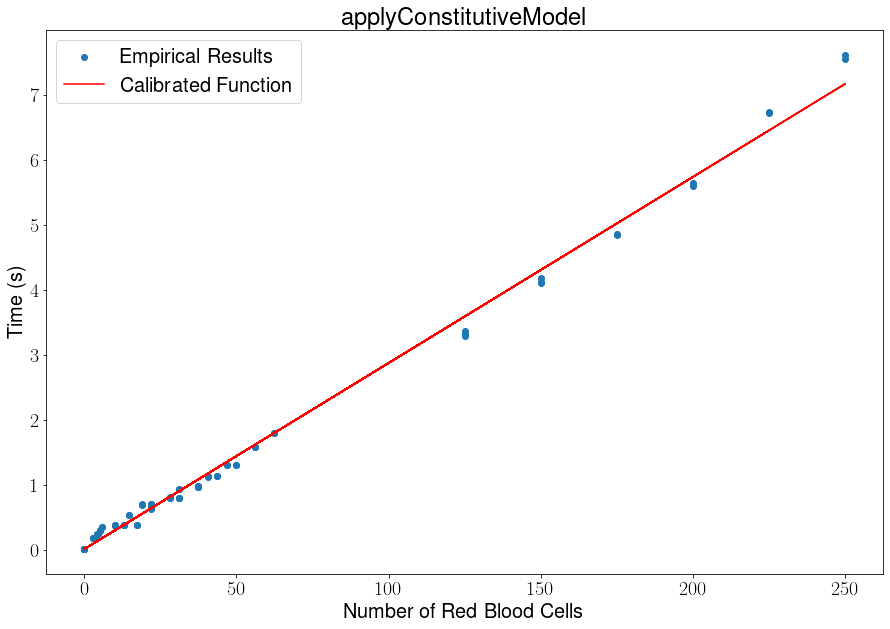

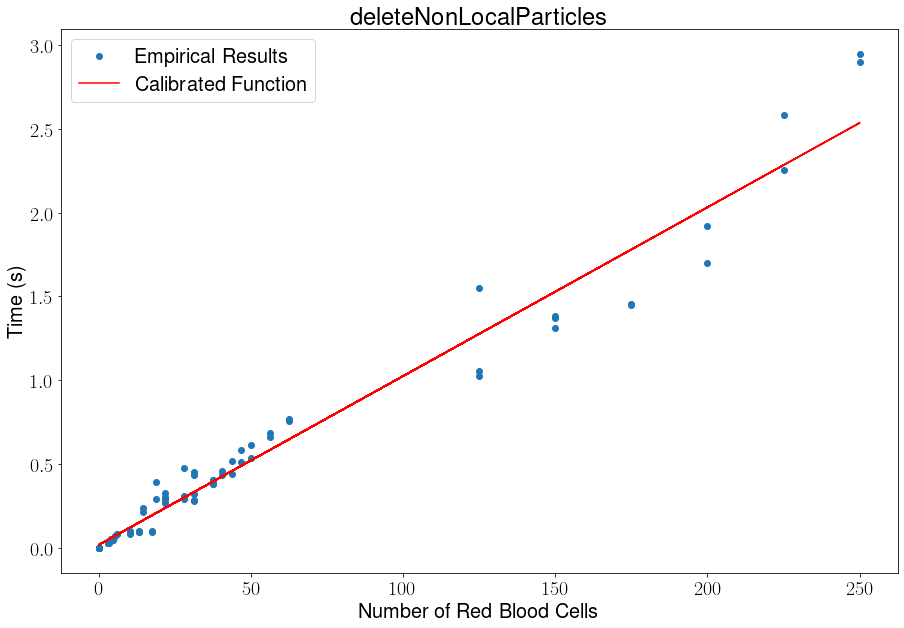

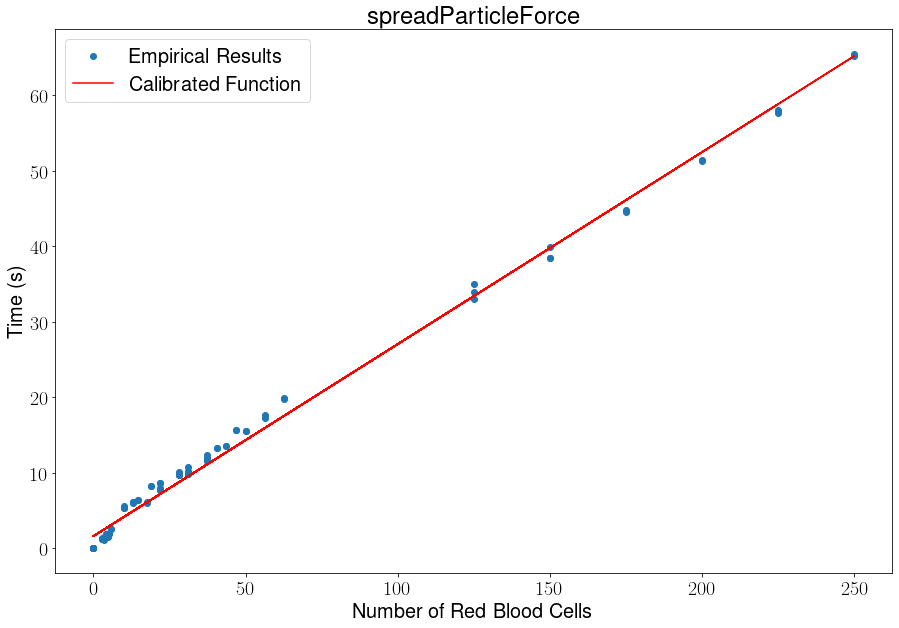

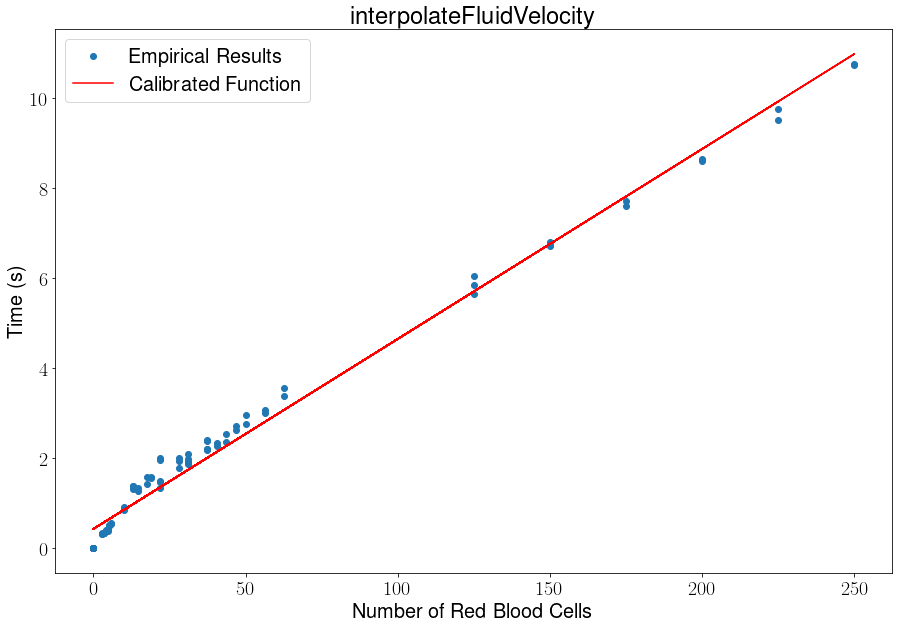

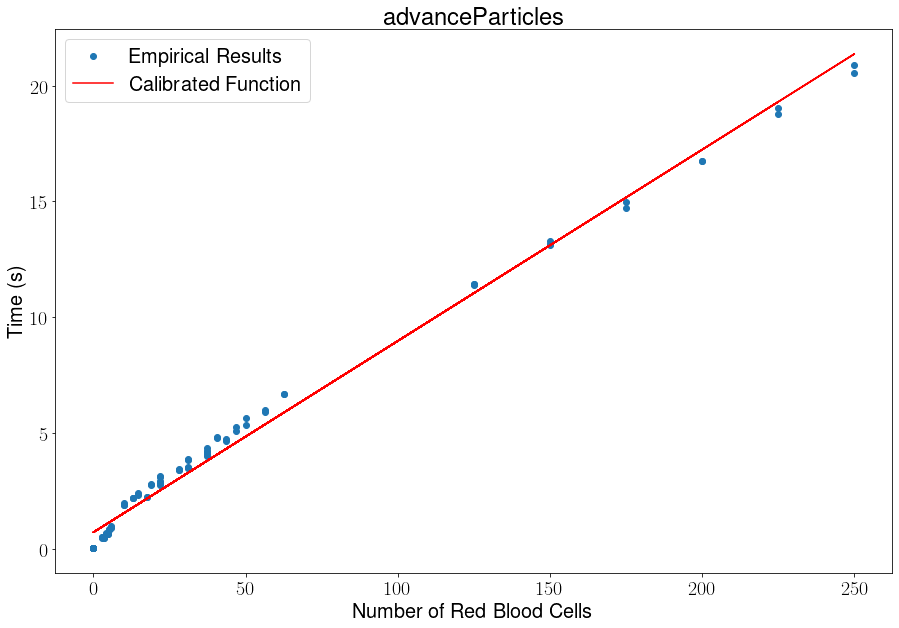

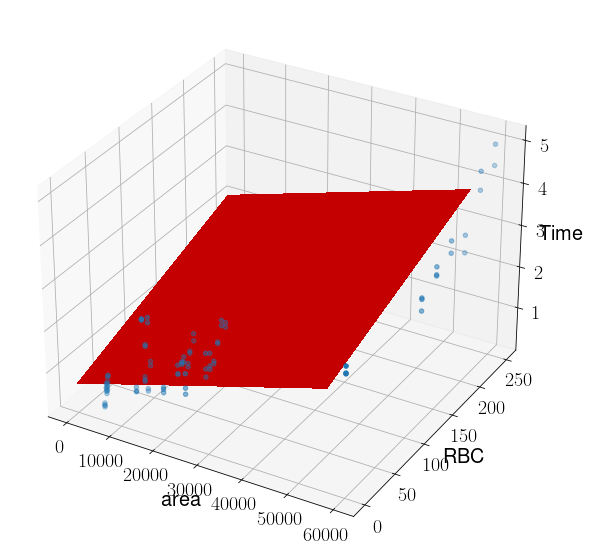

In [23]:
models = {}

for component in ["collideAndStream", "setExternalVector"]:
    plt.figure(figsize=(10, 10))
    
    tmpdf = fitting_df.loc[fitting_df['component'] == component]    
    plt.scatter(tmpdf['N'], tmpdf['comp'])
    
    res = stats.linregress(tmpdf['N'], tmpdf['comp'])
    plt.plot(tmpdf['N'], res.intercept + res.slope*tmpdf['N'], 'r', label='fitted line')
    models[component] = res

    plt.title(str(component))
    plt.xlabel("N")
    plt.ylabel("Time")
#     plt.show()

    print(component)
    print("{} + (xs \\times ys \\times zs) * {}".format(res.intercept, res.slope))
    

for component in ["collideAndStream"]:
    plt.figure(figsize=(10, 10))
    
    tmpdf = fitting_df.loc[fitting_df['component'] == component]    
    plt.scatter(tmpdf['area'], tmpdf['comm'], label='Emperical Results')

    res = stats.linregress(tmpdf['area'], tmpdf['comm'])
    models[component+"_comm"] = res
    plt.plot(tmpdf['area'], res.intercept + res.slope*tmpdf['area'], 'r', label='Fitted line')
    
    plt.title(str(component) + "communication")
    plt.xlabel("xs * ys * zs")
    plt.ylabel("Time")
    plt.show()
    print(component)
    print("{} + (xs, ys, zs) * {}".format(res.intercept, res.slope))

    
for component in ["syncEnvelopes", "applyConstitutiveModel", "deleteNonLocalParticles", "spreadParticleForce", "interpolateFluidVelocity", "advanceParticles"]:
    plt.figure(figsize=(15, 10))
    
    tmpdf = fitting_df.loc[fitting_df['component'] == component]

    plt.scatter(tmpdf['RBCs'], tmpdf['comp'], label='Empirical Results')
    
    res = stats.linregress(tmpdf['RBCs'], tmpdf['comp'])
    models[component] = res

    plt.plot(tmpdf['RBCs'], res.intercept + res.slope*tmpdf['RBCs'], 'r', label='Calibrated Function')
    plt.title(str(component))
    plt.xlabel("Number of Red Blood Cells")
    plt.ylabel("Time (s)")
    plt.legend()
    plt.rcParams.update({'font.size': 20})
    print(component)
    print("{} + RBCs * {}".format(res.intercept, res.slope))
    if(component == "advanceParticles"):
        plt.savefig("model-prediction_ap.pdf", bbox_inches='tight')
        plt.savefig("model-prediction_ap.svg", bbox_inches='tight')
#     plt.show()

def function_calc(x, a, b, c):
    return a + b*x[0] + c*x[1]
    
for component in ["syncEnvelopes"]:
    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    
    tmpdf = fitting_df.loc[fitting_df['component'] == component]    
    ax.scatter(tmpdf['area'], tmpdf['RBCs'], tmpdf['comm'])
    
    popt, pcov = curve_fit(function_calc, [tmpdf['area'],tmpdf['RBCs']], tmpdf['comm'])
    models[component+"_comm"] = popt
    # Make data.
    X = np.arange(0, 60000, 4000)
    Y = np.arange(0, 250, 12)
    X, Y = np.meshgrid(X, Y)
    Z = np.array(popt[0] + X*popt[1] + Y*popt[2])
    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, color='r', linewidth=0, antialiased=False)    
    ax.set_xlabel("area")
    ax.set_ylabel("RBC")
    ax.set_zlabel("Time")
#     plt.show()
    print(component)
    print("{} + (xs, ys, zs) * {} + RBCs * {}".format(popt[0], popt[1], popt[2]))


In [24]:
def run_model(models, size, RBCs):
    total = 0
    for component in ["collideAndStream", "setExternalVector"]:
        res = models[component]
        total += res.intercept + res.slope *  size[0] * size[1] * size[2]
    
    for component in ["collideAndStream_comm"]:
        res = models[component]
        total += res.intercept + res.slope *  2*((size[0]*size[1])+(size[0]*size[2])+(size[1]*size[2]))
        
    for component in ["syncEnvelopes", "advanceParticles", "applyConstitutiveModel", "deleteNonLocalParticles", "spreadParticleForce", "interpolateFluidVelocity"]:
        res = models[component]
        total += res.intercept + res.slope * RBCs
        
    for component in ["syncEnvelopes_comm"]:
        popt = models[component]
        total += popt[0] + 2*((size[0]*size[1])+(size[0]*size[2])+(size[1]*size[2]))*popt[1] + RBCs*popt[2]
    
    return total

<Figure size 1440x1440 with 0 Axes>

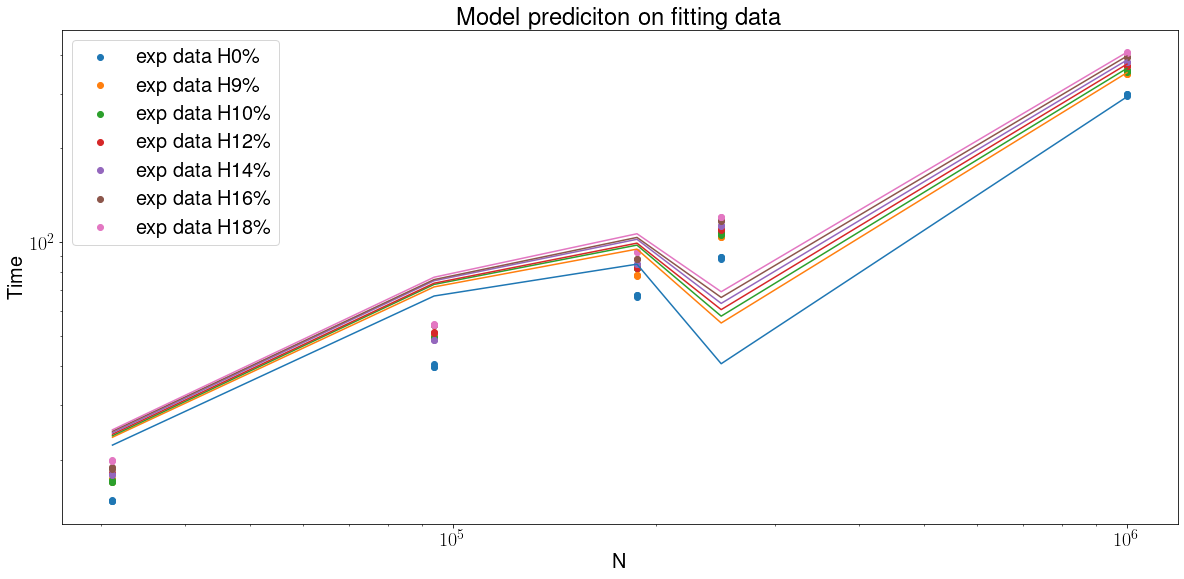

,size,RBCs,mean,std,prediction,mse
0,"(25, 50, 25)",0.000000,14.721411,0.048247,22.267022,56.94
1,"(50, 75, 50)",0.000000,67.391923,0.409805,67.079656,0.27
2,"(50, 100, 50)",0.000000,88.861912,0.574866,84.890090,16.11
3,"(75, 25, 50)",0.000000,39.905775,0.393190,40.650555,0.71
4,"(100, 100, 100)",0.000000,296.692953,2.185784,292.884315,19.28
5,"(25, 50, 25)",2.916667,17.227517,0.166027,23.600942,40.65
6,"(100, 100, 100)",125.000000,347.047673,1.259236,350.052313,10.61
7,"(25, 50, 25)",3.500000,16.991345,0.116938,23.867726,47.30
8,"(100, 100, 100)",150.000000,355.717383,2.080675,361.485913,37.61
9,"(25, 50, 25)",4.083333,18.100208,0.000832,24.134510,36.41


In [25]:
ids = np.unique(fitting_df['jobid'])

new_data = []

for i in ids:
    tmpdf = raw_df.loc[raw_df['jobid'] == i]
    new_data.append([i, np.array(tmpdf['N'])[0], np.array(tmpdf['size'])[0], np.array(tmpdf['RBCs'])[0], np.array(tmpdf['H'])[0], np.array(tmpdf['total']).sum()])

tmpdf = pd.DataFrame(new_data, columns=['jobid', 'N', 'size', 'RBCs', 'H', 'total'])
plt.figure(figsize=(20, 20))

# print(tmpdf)    print(d['N'])

def unique(x, axis=0):
    seen = []
    new = []
    
    for tmp in x:
        if tmp[axis] not in seen:
            seen.append(tmp[axis])
            new.append(tmp)
    return np.sort(np.array(new, dtype=object), axis=0)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 1, 1)


new_data = []
for H in set(tmpdf['H']):
    d = tmpdf.loc[tmpdf['H'] == H]
    plt.scatter(d['N'], d['total'], label='exp data H{}\%'.format(H))
    setups = unique([list(x) for x in zip(d['N'], d['size'], d['RBCs'])])
    predictions = [ run_model(models, s, r) for _, s, r in setups]
    plt.plot(setups[:,0], predictions)
    
    for _, size, rbc in setups:
        tmp = tmpdf.loc[tmpdf['size'] == size]
        tmp = tmp.loc[tmpdf['RBCs'] == rbc]
        if len(tmp['total']) == 0:
            continue

        prediciton = run_model(models, size, rbc)
        mse = ((np.array(tmp['total']) - prediciton)**2).mean()
#         rse = ((tmp['total'] - prediciton) ** 2).sum() / ((tmp['total'] - tmp['total'].mean()) ** 2).sum()
        new_data.append([size, rbc, np.mean(tmp['total']), np.std(np.array(tmp['total'])), prediciton, mse.round(2)])


plt.legend()

plt.title("Model prediciton on fitting data")
plt.xlabel("N")
plt.ylabel("Time")
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

predictiondf = pd.DataFrame(new_data, columns=['size', 'RBCs', 'mean', 'std', 'prediction', 'mse'])
predictiondf

([<matplotlib.axis.XTick at 0x7fe5394ae4c0>,
 [Text(0, 0, '(25, 50, 25)'),
  Text(1, 0, '(75, 25, 50)'),
  Text(2, 0, '(50, 75, 50)'),
  Text(3, 0, '(50, 100, 50)'),
  Text(4, 0, '(100, 100, 100)')])

<Figure size 1440x1440 with 0 Axes>

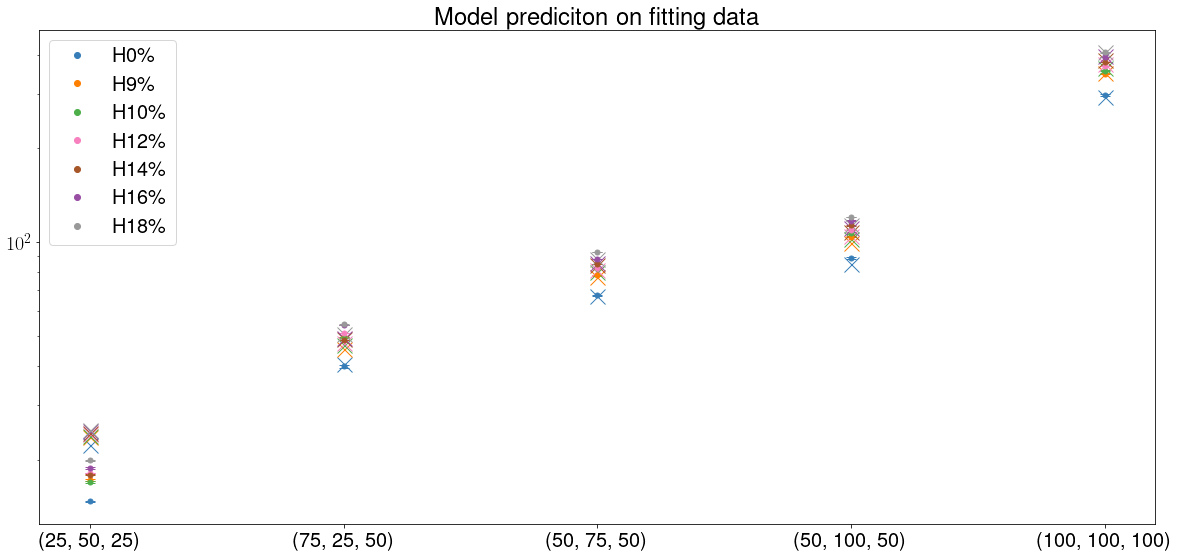

In [26]:
ids = np.unique(fitting_df['jobid'])

new_data = []

for i in ids:
    tmpdf = raw_df.loc[raw_df['jobid'] == i]
    new_data.append([i, np.array(tmpdf['N'])[0], np.array(tmpdf['size'])[0], np.array(tmpdf['RBCs'])[0], np.array(tmpdf['H'])[0], np.array(tmpdf['total']).sum()])

tmpdf = pd.DataFrame(new_data, columns=['jobid', 'N', 'size', 'RBCs', 'H', 'total'])
plt.figure(figsize=(20, 20))

# print(tmpdf)    print(d['N'])

def unique(x, axis=0):
    seen = []
    new = []
    
    for tmp in x:
        if tmp[axis] not in seen:
            seen.append(tmp[axis])
            new.append(tmp)
    return np.sort(np.array(new, dtype=object), axis=0)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 1, 1)

fit_exp_df = exp_df.loc[exp_df['sizestr'].isin(fitting_sizes)].sort_values("N")
# print(fit_exp_df)


for i, sizestr in enumerate(pd.unique(fit_exp_df['sizestr'])):
    s = np.array(fit_exp_df.loc[fit_exp_df['sizestr'] == sizestr]['size'])[0]
    
    legend_handels = []
    for hi, H in enumerate(np.unique(np.sort(fit_exp_df['H']))):
        t = fit_exp_df.loc[fit_exp_df['sizestr'] == sizestr]
        r = np.array(t.loc[t['H'] == H]['RBCs'])[0]

        tmp = tmpdf.loc[tmpdf['H'] == H]
        tmp = tmp.loc[tmp['size'] == s]
        
        plt.errorbar(i, np.mean(tmp['total']), yerr=np.std(tmp['total']), ms=10, color=CB_color_cycle[hi], fmt=".", capsize=5, lw=1, )
        plt.plot(i, run_model(models, s, r), 'x', color=CB_color_cycle[hi], ms=15)
        
        legend_handels.append( Line2D([0], [0], color=CB_color_cycle[hi], lw=0, marker='o', label='H{}\%'.format(H)))
        

plt.title("Model prediciton on fitting data")
plt.legend(handles=legend_handels)
ax.set_yscale('log')
# plt.xticks(, pd.unique(fit_exp_df['sizestr']), rotation='vertical')
plt.xticks(range(np.unique(np.sort(fit_exp_df['sizestr'])).size), [np.array(fit_exp_df.loc[fit_exp_df['sizestr']==x]['size'])[0] for x in pd.unique(fit_exp_df['sizestr'])])


In [27]:
ids = np.unique(fitting_df['jobid'])

new_data = []

sizes = np.unique(fitting_df['size'])
RBCs = np.unique(fitting_df['RBCs'])

for c in components:
    for size in sizes:
        for RBC in RBCs:
            tmpdf = fitting_df.loc[fitting_df['component'] == c]
            tmpdf = tmpdf.loc[tmpdf['size'] == size]
            tmpdf = tmpdf.loc[tmpdf['RBCs'] == RBC]
            if len(tmpdf['comp']) == 0:
                continue
            
            if c in ["collideAndStream", "setExternalVector"]:
                res = models[c]
                prediction = res.intercept + res.slope *  size[0] * size[1] * size[2]

            if c in ["syncEnvelopes", "advanceParticles", "applyConstitutiveModel", "deleteNonLocalParticles", "spreadParticleForce", "interpolateFluidVelocity"]:
                res = models[c]
                prediction = res.intercept + res.slope * RBC
            
            mse = ((tmpdf['comp'] - prediction) ** 2).mean()
            new_data.append([c, size, RBC, np.array(tmpdf['comp']).mean(), np.array(tmpdf['comp']).std(), prediction, mse])
            
            if not np.all(tmpdf['comm']==0):
                if c in ["syncEnvelopes"]:
                    popt = models[c+"_comm"]
                    prediction = popt[0] + 2*((size[0]*size[1])+(size[0]*size[2])+(size[1]*size[2]))*popt[1] + RBC*popt[2]
                if c in ["collideAndStream"]:
                    res = models[c + "_comm"]
                    prediction = res.intercept + res.slope *  2*((size[0]*size[1])+(size[0]*size[2])+(size[1]*size[2]))
                
                mse = ((tmpdf['comm'] - prediction)** 2).mean() 
                new_data.append([c+'_comm', size, RBC, np.array(tmpdf['comm']).mean(), np.array(tmpdf['comm']).std(), prediction, mse.round(2)])

predictiondf = pd.DataFrame(new_data, columns=['component', 'size', 'RBCs', 'mean', 'std', 'prediction', 'mse'])
predictiondf.loc[predictiondf['component'] == 'collideAndStream']

,component,size,RBCs,mean,std,prediction,mse
35,collideAndStream,"(25, 50, 25)",0.000000,11.965600,0.116638,15.517020,12.626185
37,collideAndStream,"(25, 50, 25)",2.916667,10.814867,0.316859,15.517020,22.210641
39,collideAndStream,"(25, 50, 25)",3.500000,10.907000,0.257789,15.517020,21.318736
41,collideAndStream,"(25, 50, 25)",4.083333,10.431450,0.016750,15.517020,25.863299
43,collideAndStream,"(25, 50, 25)",4.666667,10.973550,0.120350,15.517020,20.657600
45,collideAndStream,"(25, 50, 25)",5.250000,10.592700,0.006100,15.517020,24.248961
47,collideAndStream,"(25, 50, 25)",5.833333,10.563150,0.134850,15.517020,24.559008
49,collideAndStream,"(50, 75, 50)",0.000000,56.645567,0.435319,53.737951,8.643731
51,collideAndStream,"(50, 75, 50)",21.875000,53.112533,0.504339,53.737951,0.645505
53,collideAndStream,"(50, 75, 50)",28.125000,55.496033,0.308374,53.737951,3.185948


# Prediciton

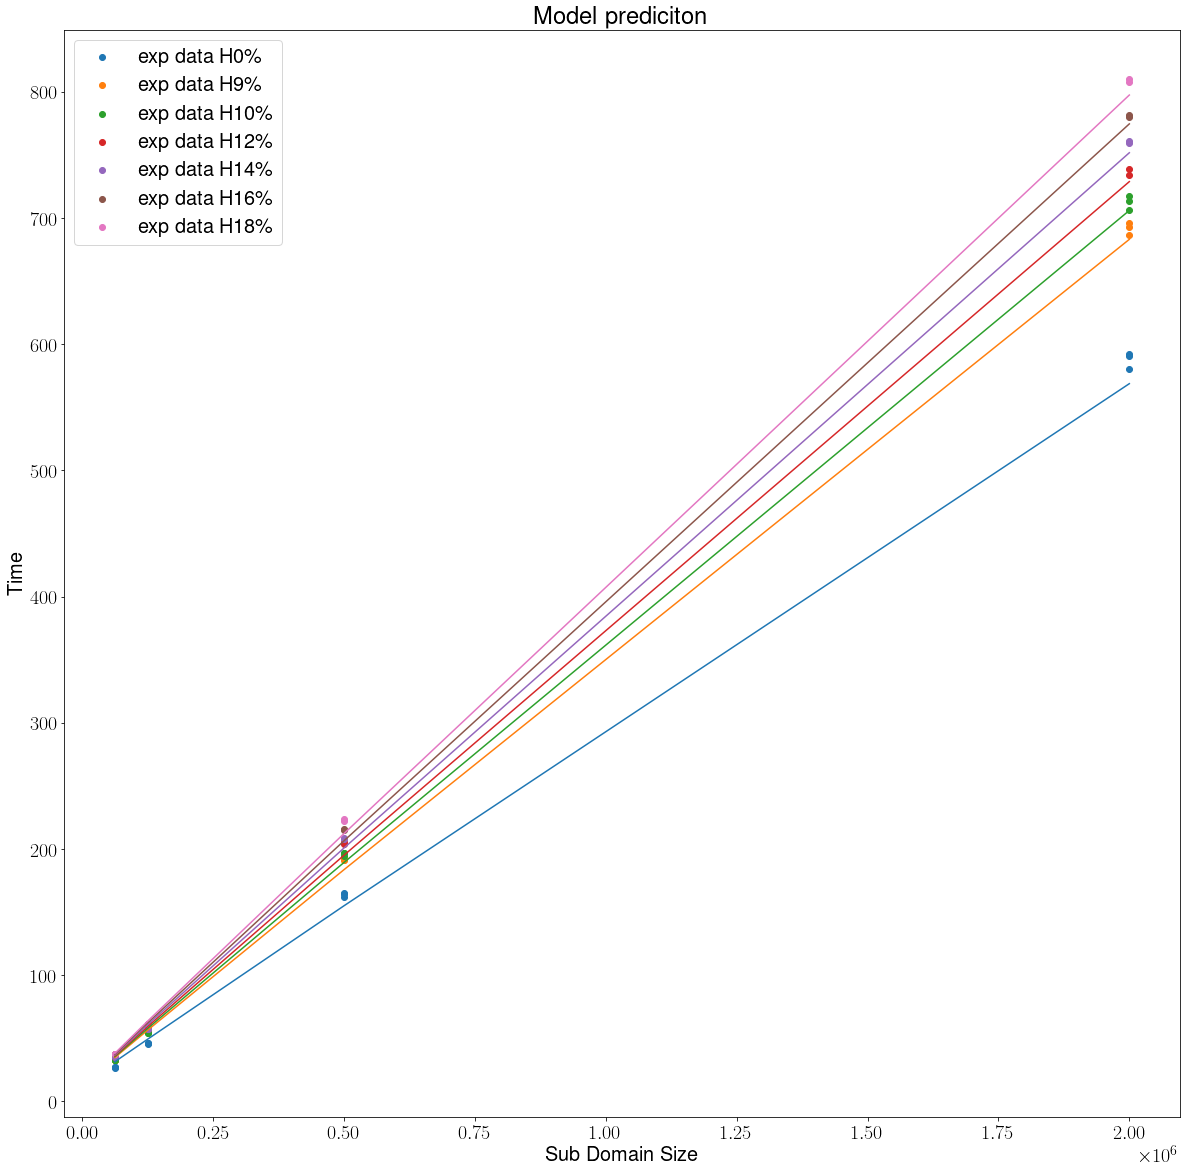

,size,RBCs,mean,std,prediction,mse
0,"(25, 50, 50)",0.000000,27.103863,0.128154,31.458788,18.98
1,"(50, 50, 50)",0.000000,45.967470,0.342957,49.269222,11.02
2,"(50, 100, 100)",0.000000,163.961022,1.180078,154.985630,81.95
3,"(100, 200, 100)",0.000000,587.772987,5.396611,568.681686,393.60
4,"(25, 50, 50)",7.291667,32.895513,0.223896,34.793588,3.65
5,"(50, 50, 50)",15.625000,55.246070,0.233843,56.415222,1.42
6,"(50, 100, 100)",62.500000,191.619655,0.516177,183.569629,65.07
7,"(100, 200, 100)",250.000000,691.625163,3.999603,683.017683,90.09
8,"(25, 50, 50)",8.750000,32.717619,0.096614,35.460548,7.53
9,"(50, 50, 50)",18.750000,56.711530,3.521142,57.844422,13.68


In [28]:
ids = np.unique(testing_df['jobid'])

new_data = []

for i in ids:
    tmpdf = raw_df.loc[raw_df['jobid'] == i]
    new_data.append([i, np.array(tmpdf['N'])[0], np.array(tmpdf['size'])[0], np.array(tmpdf['RBCs'])[0], np.array(tmpdf['H'])[0], np.array(tmpdf['total']).sum()])

tmpdf = pd.DataFrame(new_data, columns=['jobid', 'N', 'size', 'RBCs', 'H', 'total'])
plt.figure(figsize=(20, 20))

# print(tmpdf)    print(d['N'])

def unique(x, axis=0):
    seen = []
    new = []
    
    for tmp in x:
        if tmp[axis] not in seen:
            seen.append(tmp[axis])
            new.append(tmp)
    return np.array(new, dtype=object)

new_data = []
for H in set(tmpdf['H']):
    d = tmpdf.loc[tmpdf['H'] == H]
    plt.scatter(d['N'], d['total'], label='exp data H{}\%'.format(H))
    setups = unique([list(x) for x in zip(d['N'], d['size'], d['RBCs'])])
    predictions = [ run_model(models, s, r) for _, s, r in setups]
    plt.plot(setups[:,0], predictions)
    
    for _, size, rbc in setups:
        tmp = tmpdf.loc[tmpdf['size'] == size]
        tmp = tmp.loc[tmpdf['RBCs'] == rbc]
        if len(tmp['total']) == 0:
            continue

        prediciton = run_model(models, size, rbc)
        mse = ((np.array(tmp['total']) - prediciton)**2).mean()
#         rse = ((tmp['total'] - prediciton) ** 2).sum() / ((tmp['total'] - tmp['total'].mean()) ** 2).sum()

        new_data.append([size, rbc, np.mean(tmp['total']), np.std(np.array(tmp['total'])), prediciton, mse.round(2)])



plt.legend()

plt.title("Model prediciton")
plt.xlabel("Sub Domain Size")
plt.ylabel("Time")
plt.savefig("Model_prediction.pdf")
plt.show()

predictiondf = pd.DataFrame(new_data, columns=['size', 'RBCs', 'mean', 'std', 'prediction', 'mse'])
predictiondf

<Figure size 1440x1440 with 0 Axes>

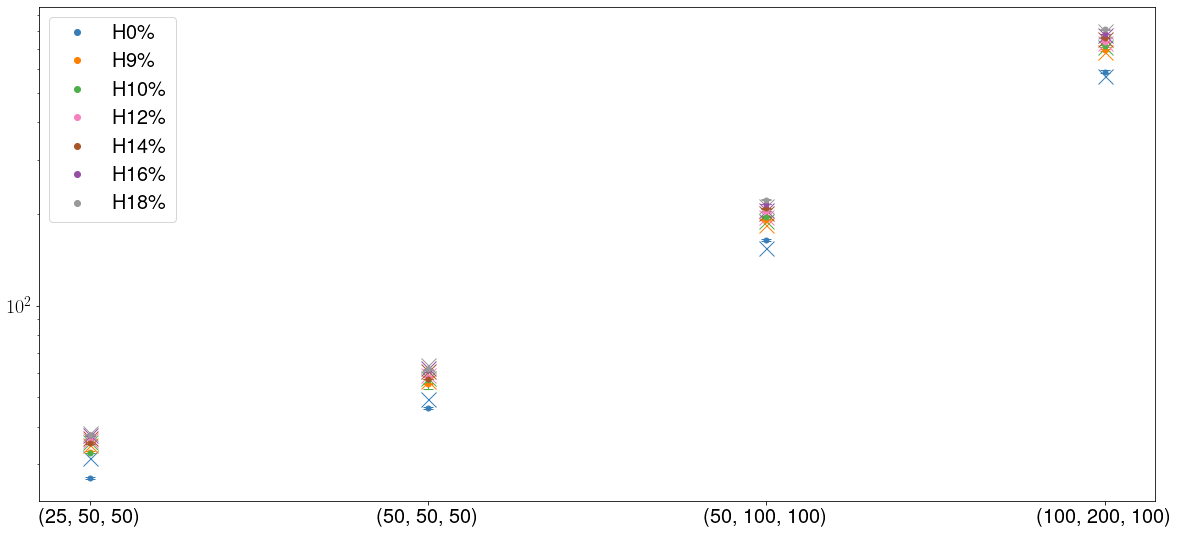

In [29]:
ids = np.unique(testing_df['jobid'])

new_data = []

for i in ids:
    tmpdf = raw_df.loc[raw_df['jobid'] == i]
    new_data.append([i, np.array(tmpdf['N'])[0], np.array(tmpdf['size'])[0], np.array(tmpdf['RBCs'])[0], np.array(tmpdf['H'])[0], np.array(tmpdf['total']).sum()])

tmpdf = pd.DataFrame(new_data, columns=['jobid', 'N', 'size', 'RBCs', 'H', 'total'])
plt.figure(figsize=(20, 20))

# print(tmpdf)    print(d['N'])

def unique(x, axis=0):
    seen = []
    new = []
    
    for tmp in x:
        if tmp[axis] not in seen:
            seen.append(tmp[axis])
            new.append(tmp)
    return np.sort(np.array(new, dtype=object), axis=0)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 1, 1)

fit_exp_df = exp_df.loc[exp_df['sizestr'].isin(testing_sizes)].sort_values("N")
# print(fit_exp_df)


for i, sizestr in enumerate(pd.unique(fit_exp_df['sizestr'])):
    s = np.array(fit_exp_df.loc[fit_exp_df['sizestr'] == sizestr]['size'])[0]
    
    legend_handels = []
    for hi, H in enumerate(np.unique(np.sort(fit_exp_df['H']))):
        t = fit_exp_df.loc[fit_exp_df['sizestr'] == sizestr]
        r = np.array(t.loc[t['H'] == H]['RBCs'])[0]

        tmp = tmpdf.loc[tmpdf['H'] == H]
        tmp = tmp.loc[tmp['size'] == s]
        
        plt.errorbar(i, np.mean(tmp['total']), yerr=np.std(tmp['total']), ms=10, color=CB_color_cycle[hi], fmt=".", capsize=5, lw=1, )
        plt.plot(i, run_model(models, s, r), 'x', color=CB_color_cycle[hi], ms=15)
        
        legend_handels.append( Line2D([0], [0], color=CB_color_cycle[hi], lw=0, marker='o', label='H{}\%'.format(H)))
        

plt.legend(handles=legend_handels)
ax.set_yscale('log')
# plt.xticks(, pd.unique(fit_exp_df['sizestr']), rotation='vertical')
plt.xticks(range(np.unique(np.sort(fit_exp_df['sizestr'])).size), [np.array(fit_exp_df.loc[fit_exp_df['sizestr']==x]['size'])[0] for x in pd.unique(fit_exp_df['sizestr'])])
plt.savefig("model-prediction.png", bbox_inches='tight', dpi=300)

In [30]:
ids = np.unique(testing_df['jobid'])

new_data = []

for i in ids:
    tmpdf = testing_df.loc[testing_df['jobid'] == i]
    new_data.append([i, np.array(tmpdf['size'])[0], np.array(tmpdf['RBCs'])[0], np.array(tmpdf['total']).sum()])

tmpdf = pd.DataFrame(new_data, columns=['jobid', 'size', 'RBCs', 'total'])

sizes = np.unique(tmpdf['size'])
RBCs = np.unique(tmpdf['RBCs'])

new_data = []
for size in sizes:
    for rbc in RBCs:
        tmp = tmpdf.loc[tmpdf['size'] == size]
        tmp = tmp.loc[tmpdf['RBCs'] == rbc]
        if len(tmp['total']) == 0:
            continue
        
        prediciton = run_model(models, size, rbc)
        mse = ((np.array(tmp['total']) - prediciton) ** 2).mean()

        new_data.append([size, rbc.round(2), np.mean(tmp['total']).round(2), np.std(np.array(tmp['total'])).round(2), prediciton.round(2), mse.round(2)])
        
predictiondf = pd.DataFrame(new_data, columns=['size', 'RBCs', 'mean', 'std', 'prediction', 'mse'])
print(predictiondf.to_latex())

\begin{tabular}{llrrrrr}
\toprule
{} &             size &    RBCs &    mean &   std &  prediction &     mse \\
\midrule
0  &     (25, 50, 50) &    0.00 &   27.10 &  0.13 &       31.46 &   18.98 \\
1  &     (25, 50, 50) &    7.29 &   32.90 &  0.22 &       34.79 &    3.65 \\
2  &     (25, 50, 50) &    8.75 &   32.72 &  0.10 &       35.46 &    7.53 \\
3  &     (25, 50, 50) &   10.21 &   35.85 &  0.53 &       36.13 &    0.36 \\
4  &     (25, 50, 50) &   11.67 &   35.23 &  0.22 &       36.79 &    2.50 \\
5  &     (25, 50, 50) &   13.12 &   37.44 &  0.13 &       37.46 &    0.02 \\
6  &     (25, 50, 50) &   14.58 &   37.64 &  0.07 &       38.13 &    0.25 \\
7  &     (50, 50, 50) &    0.00 &   45.97 &  0.34 &       49.27 &   11.02 \\
8  &     (50, 50, 50) &   15.62 &   55.25 &  0.23 &       56.42 &    1.42 \\
9  &     (50, 50, 50) &   18.75 &   56.71 &  3.52 &       57.84 &   13.68 \\
10 &     (50, 50, 50) &   21.88 &   58.41 &  0.13 &       59.27 &    0.77 \\
11 &     (50, 50, 50) &   25.00 &

/tmp/ipykernel_18719/1436208390.py:28: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(predictiondf.to_latex())


(25, 50, 50) & 0\% & $\num{27.1039}\pm \num{0.128154}$& $\num{31.4588}$ & $\num{16.0675}$\\
(25, 50, 50) & 9\% & $\num{32.8955}\pm \num{0.223896}$& $\num{34.7936}$ & $\num{5.7700}$\\
(25, 50, 50) & 10\% & $\num{32.7176}\pm \num{0.096614}$& $\num{35.4605}$ & $\num{8.3836}$\\
(25, 50, 50) & 12\% & $\num{35.8498}\pm \num{0.530046}$& $\num{36.1275}$ & $\num{0.7748}$\\
(25, 50, 50) & 14\% & $\num{35.2296}\pm \num{0.219433}$& $\num{36.7945}$ & $\num{4.4418}$\\
(25, 50, 50) & 16\% & $\num{37.4415}\pm \num{0.127327}$& $\num{37.4614}$ & $\num{0.0533}$\\
(25, 50, 50) & 18\% & $\num{37.6359}\pm \num{0.068781}$& $\num{38.1284}$ & $\num{1.3086}$\\
(50, 50, 50) & 0\% & $\num{45.9675}\pm \num{0.342957}$& $\num{49.2692}$ & $\num{7.1828}$\\
(50, 50, 50) & 9\% & $\num{55.2461}\pm \num{0.233843}$& $\num{56.4152}$ & $\num{2.1163}$\\
(50, 50, 50) & 10\% & $\num{56.7115}\pm \num{3.521142}$& $\num{57.8444}$ & $\num{1.9976}$\\
(50, 50, 50) & 12\% & $\num{58.4073}\pm \num{0.132861}$& $\num{59.2736}$ & $\num{1.

<Figure size 1080x1440 with 0 Axes>

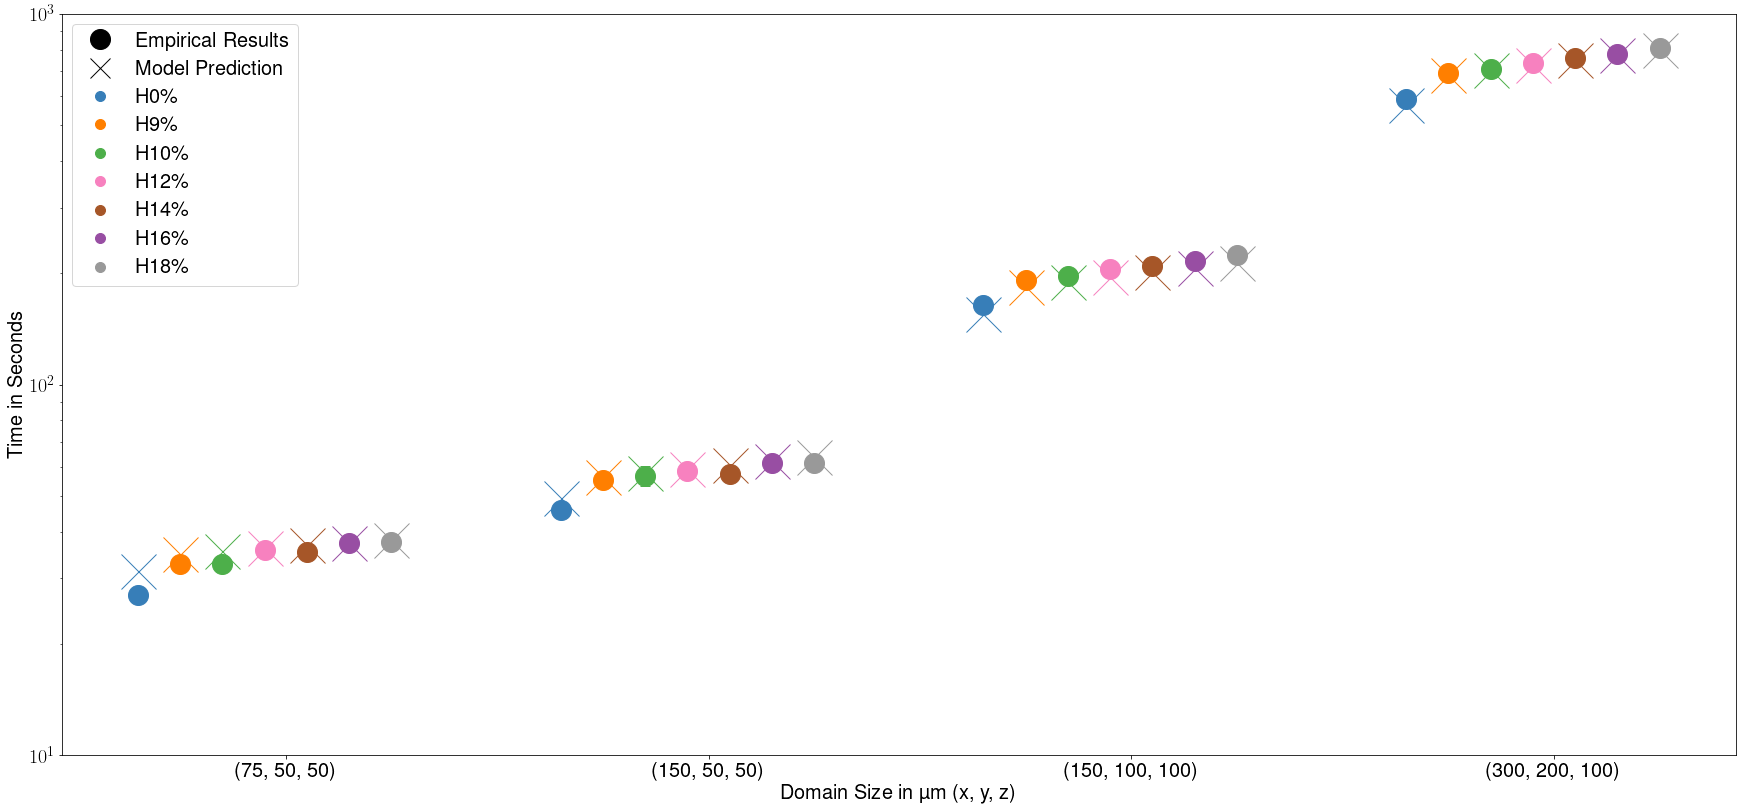

In [39]:
ids = np.unique(testing_df['jobid'])

new_data = []

for i in ids:
    tmpdf = raw_df.loc[raw_df['jobid'] == i]
    new_data.append([i, np.array(tmpdf['N'])[0], np.array(tmpdf['size'])[0], np.array(tmpdf['total_size'])[0], np.array(tmpdf['RBCs'])[0], np.array(tmpdf['H'])[0], np.array(tmpdf['total']).sum()])

tmpdf = pd.DataFrame(new_data, columns=['jobid', 'N', 'size', 'total_size', 'RBCs', 'H', 'total'])
plt.figure(figsize=(15, 20))

# print(tmpdf)    print(d['N'])

def unique(x, axis=0):
    seen = []
    new = []
    
    for tmp in x:
        if tmp[axis] not in seen:
            seen.append(tmp[axis])
            new.append(tmp)
    return np.sort(np.array(new, dtype=object), axis=0)

fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(2, 1, 1)

fit_exp_df = exp_df.loc[exp_df['sizestr'].isin(testing_sizes)].sort_values("N")
# print(fit_exp_df)

width = .7
stride = width / np.unique(np.sort(fit_exp_df['H'])).size

for i, sizestr in enumerate(pd.unique(fit_exp_df['sizestr'])):
    s = np.array(fit_exp_df.loc[fit_exp_df['sizestr'] == sizestr]['size'])[0]
    
    legend_handels = []
    offset = width/2
    for hi, H in enumerate(np.unique(np.sort(fit_exp_df['H']))):
        t = fit_exp_df.loc[fit_exp_df['sizestr'] == sizestr]
        r = np.array(t.loc[t['H'] == H]['RBCs'])[0]

        tmp = tmpdf.loc[tmpdf['H'] == H]
        tmp = tmp.loc[tmp['size'] == s]
        
        plt.errorbar(i - offset, np.mean(tmp['total']), yerr=np.std(tmp['total']), ms=40, color=CB_color_cycle[hi], fmt=".", capsize=5, lw=1)
        plt.plot(i - offset, run_model(models, s, r), 'x', color=CB_color_cycle[hi], ms=35)
        
        offset -= stride
        legend_handels.append( Line2D([0], [0], color=CB_color_cycle[hi], lw=0, marker='o', ms=10, label='H{}\%'.format(H)))
        # legend_handels.append( Line2D([0], [0], color=CB_color_cycle[hi], lw=0, marker='x', label='H{}\ Prediction%'.format(H)))
        pred = run_model(models, s, r)
        res = np.mean(tmp['total'])
        std = np.std(tmp['total'])
        err = np.abs(pred - res) * (100 / res)
        tmpstr = "{} & {}\% ".format(np.array(tmp["size"])[0],  H, )
        tmpstr += "& $\\num{{{0:.4f}}}".format(res)
        tmpstr += "\pm \\num{{{0:4f}}}".format(std)
        tmpstr += "$& $\\num{{{0:.4f}}}".format(pred)
        tmpstr += "$ & $\\num{{{0:.4f}}}$\\\\".format(err)
        # print(tmp['total'])
        print(tmpstr)

legend_handels.insert(0, Line2D([0], [0], color='k', lw=0, marker='x', ms=20, label='Model Prediction'.format(H)))        
legend_handels.insert(0, Line2D([0], [0], color='k', lw=0, marker='o', ms=20, label='Empirical Results'.format(H)))

plt.rcParams.update({'font.size': 20})
# plt.rcParams.update({'axes.linewidth': 5})
plt.rcParams.update({'font.weight': 'bold'})
# plt.rcParams.update({'font.size': 20})

plt.legend(handles=legend_handels)
ax.set_yscale('log')
plt.ylim(10, 1000)
plt.ylabel("Time in Seconds")
plt.xlabel("Domain Size in µm (x, y, z)")
# plt.title("Model Verification on DAS-6 (1 node, 24 processes)")
# plt.xticks(, pd.unique(fit_exp_df['sizestr']), rotation='vertical')
plt.xticks(range(np.unique(np.sort(fit_exp_df['total_size'])).size), [ "({:g}, {:g}, {:g})".format(0.5 * x[0], 0.5 * x[1],0.5 * x[2])  for x in pd.unique(fit_exp_df['total_size'])])
# plt.tight_layout()
plt.savefig("model-prediction_das6.pdf", bbox_inches='tight')
plt.savefig("model-prediction_das6.svg", bbox_inches='tight')
plt.savefig("model-prediction_das6.pdf", bbox_inches='tight')

In [32]:
# fig = plt.figure(figsize=(20, 30))
# ax = fig.add_subplot(2, 1, 1)

# plt.plot([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 75, 70, 75, 80, 85, 90, 95, 100], [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 7.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10] , label="Prediction",  linewidth=10)
# plt.scatter([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 75, 70, 75, 80, 85, 90, 95, 100], [x + np.random.uniform(-1, 1) for x in [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 7.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10]], color=CB_color_cycle[1], label="Empirical Results",  s=100)
# plt.scatter([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 75, 70, 75, 80, 85, 90, 95, 100], [x + np.random.uniform(-1, 1) for x in [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 7.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10]], color=CB_color_cycle[1], s=100)


# # plt.rcParams["legend.markerscale"] = .5
# plt.legend(prop={'size': 50})
# plt.xlabel("Problem Size")
# plt.ylabel("Time")
# plt.rcParams.update({'font.size': 80})


# # ax.set_yscale('log')
# # plt.xticks(, pd.unique(fit_exp_df['sizestr']), rotation='vertical')
# # plt.xticks(range(np.unique(np.sort(fit_exp_df['sizestr'])).size), [np.array(fit_exp_df.loc[fit_exp_df['sizestr']==x]['size'])[0] for x in pd.unique(fit_exp_df['sizestr'])])
# plt.savefig("example-performance.png", bbox_inches='tight', dpi=500)

In [33]:
# plt.plot([x + np.random.uniform(-1, 1) for x in [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 7.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10]], [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 75, 70, 75, 80, 85, 90, 95, 100], '.', color=CB_color_cycle[1], label="Performance")

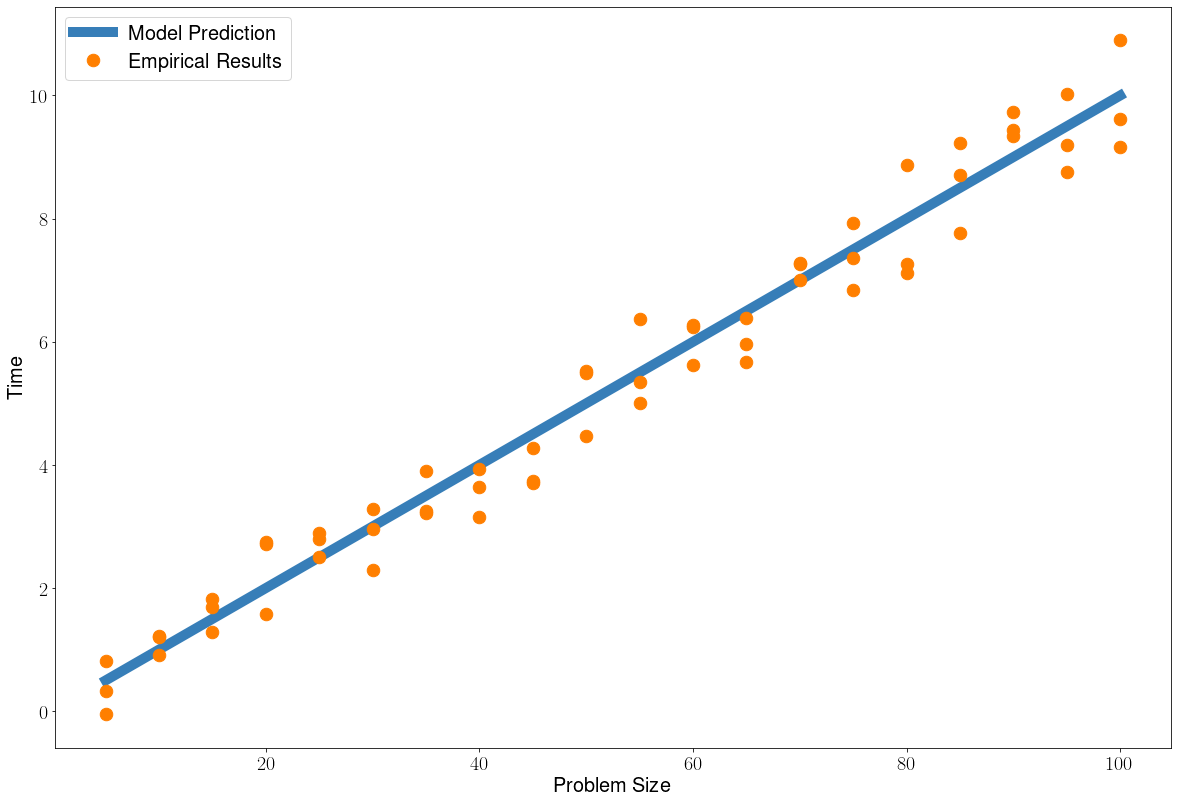

In [34]:
fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(2, 1, 1)

n = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])


plt.plot(n, n / 10, color=CB_color_cycle[0], lw=10, label='Model Prediction')
plt.plot(n, [(x / 10) + np.random.uniform(-1, 1) for x in n], '.', ms=25, color=CB_color_cycle[1],  label='Empirical Results')
plt.plot(n, [(x / 10) + np.random.uniform(-1, 1) for x in n], '.', ms=25, color=CB_color_cycle[1])
plt.plot(n, [(x / 10) + np.random.uniform(-1, 1) for x in n], '.', ms=25, color=CB_color_cycle[1])

plt.rcParams.update({'font.size': 20})
# plt.rcParams.update({'axes.linewidth': 5})
plt.rcParams.update({'font.weight': 'bold'})
# plt.rcParams.update({'font.size': 20})

# plt.ylim(10, 1000)
plt.legend()
plt.ylabel("Time")
plt.xlabel("Problem Size")
# plt.title("Model Verification on DAS-6 (1 node, 24 processes)")
# plt.xticks(, pd.unique(fit_exp_df['sizestr']), rotation='vertical')
# plt.xticks(range(np.unique(np.sort(fit_exp_df['total_size'])).size), [ "({:g}, {:g}, {:g})".format(0.5 * x[0], 0.5 * x[1],0.5 * x[2])  for x in pd.unique(fit_exp_df['total_size'])])
# plt.tight_layout()
plt.savefig("performance-example.pdf", bbox_inches='tight')
plt.savefig("performance-example.svg", bbox_inches='tight')

In [35]:
import json

In [36]:
smodel = {}

for k in models.keys():
    for component in ["collideAndStream", "setExternalVector"]:
        res = models[component]
        smodel[component] = {'offset': res.intercept, 'N': res.slope}
    
    for component in ["collideAndStream_comm"]:
        res = models[component]
        smodel[component] = {'offset': res.intercept, 'area': res.slope}
        
    for component in ["syncEnvelopes", "advanceParticles", "applyConstitutiveModel", "deleteNonLocalParticles", "spreadParticleForce", "interpolateFluidVelocity"]:
        res = models[component]
        smodel[component] = {'offset': res.intercept, 'RBCs': res.slope}

        
    for component in ["syncEnvelopes_comm"]:
        popt = models[component]
        smodel[component] = {'offset': popt[0], 'RBCs': popt[2], 'area': popt[1]}
jsonstr = json.dumps(smodel)
print(jsonstr)

{"collideAndStream": {"offset": 7.872833300421036, "N": 0.0002446139614068641}, "setExternalVector": {"offset": -0.009502031355984819, "N": 2.201383568306894e-05}, "collideAndStream_comm": {"offset": 1.1408344384654479, "area": 0.0001984598467059103}, "syncEnvelopes": {"offset": 0.07638941302386448, "RBCs": 0.03308470360599657}, "advanceParticles": {"offset": 0.7054409136450976, "RBCs": 0.08265910418043447}, "applyConstitutiveModel": {"offset": 0.005734979242557392, "RBCs": 0.02866335616415567}, "deleteNonLocalParticles": {"offset": 0.020595057883902035, "RBCs": 0.010053110319246031}, "spreadParticleForce": {"offset": 1.5957416903555846, "RBCs": 0.2542219287785848}, "interpolateFluidVelocity": {"offset": 0.4313025603954208, "RBCs": 0.042167126432770985}, "syncEnvelopes_comm": {"offset": 0.6627873050596605, "RBCs": 0.006494656586561857, "area": 3.077949529097006e-05}}


In [37]:
smodel

{'collideAndStream': {'offset': 7.872833300421036, 'N': 0.0002446139614068641},
 'setExternalVector': {'offset': -0.009502031355984819,
  'N': 2.201383568306894e-05},
 'collideAndStream_comm': {'offset': 1.1408344384654479,
  'area': 0.0001984598467059103},
 'syncEnvelopes': {'offset': 0.07638941302386448, 'RBCs': 0.03308470360599657},
 'advanceParticles': {'offset': 0.7054409136450976,
  'RBCs': 0.08265910418043447},
 'applyConstitutiveModel': {'offset': 0.005734979242557392,
  'RBCs': 0.02866335616415567},
 'deleteNonLocalParticles': {'offset': 0.020595057883902035,
  'RBCs': 0.010053110319246031},
 'spreadParticleForce': {'offset': 1.5957416903555846,
  'RBCs': 0.2542219287785848},
 'interpolateFluidVelocity': {'offset': 0.4313025603954208,
  'RBCs': 0.042167126432770985},
 'syncEnvelopes_comm': {'offset': 0.6627873050596605,
  'RBCs': 0.006494656586561857,
  'area': 3.077949529097006e-05}}

In [38]:
iters = 500

for k in smodel.keys():
    tmp = "$\\num{{{0:.2g}}}".format(smodel[k]['offset'] / 500.0)
    if 'N' in smodel[k].keys():
        tmp += " + V \\times \\num{{{0:.2g}}}".format(smodel[k]['N'] / 500.0)
    if 'area' in smodel[k].keys():
        tmp += " + SA \\times \\num{{{0:.2g}}}".format(smodel[k]['area'] / 500.0)
    if 'RBCs' in smodel[k].keys():
        tmp += " + RBCs \\times \\num{{{0:.2g}}}".format(smodel[k]['RBCs'] / 500.0)
    
    tmp += "$"
    print("{} & {}\\\\".format(k, tmp))

collideAndStream & $\num{0.016} + V \times \num{4.9e-07}$\\
setExternalVector & $\num{-1.9e-05} + V \times \num{4.4e-08}$\\
collideAndStream_comm & $\num{0.0023} + SA \times \num{4e-07}$\\
syncEnvelopes & $\num{0.00015} + RBCs \times \num{6.6e-05}$\\
advanceParticles & $\num{0.0014} + RBCs \times \num{0.00017}$\\
applyConstitutiveModel & $\num{1.1e-05} + RBCs \times \num{5.7e-05}$\\
deleteNonLocalParticles & $\num{4.1e-05} + RBCs \times \num{2e-05}$\\
spreadParticleForce & $\num{0.0032} + RBCs \times \num{0.00051}$\\
interpolateFluidVelocity & $\num{0.00086} + RBCs \times \num{8.4e-05}$\\
syncEnvelopes_comm & $\num{0.0013} + SA \times \num{6.2e-08} + RBCs \times \num{1.3e-05}$\\
